In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
set.seed(123)

players_url <- "https://raw.githubusercontent.com/jw0220/individual_project/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/jw0220/individual_project/refs/heads/main/sessions.csv"

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv(players_url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [11]:
sessions <- read_csv(sessions_url)
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


**Introduction**

In the modern gaming industry, understanding player behavior is crucial for optimizing user engagement and retention. Game developers and marketers rely on data-driven insights to enhance user experience, encourage prolonged gameplay, and foster loyalty. One key aspect of engagement is whether players choose to subscribe to game-related newsletters. These newsletters provide valuable information, including game updates, upcoming events, promotional offers, and exclusive content. By understanding the factors influencing newsletter subscriptions, gaming companies can create more personalized and effective marketing strategies.
This report investigates whether a player's amount of playtime and age can serve as reliable predictors of their subscription status to a game-related newsletter. 

**The central question guiding our analysis is: Can the user's amount of playtime and age predict whether they are subscribed to the game-related newsletter?** Answering this question could provide insights into player engagement patterns and help game developers tailor their communication efforts to different demographic groups. If strong correlations are found, targeted marketing campaigns could be designed to increase newsletter subscription rates, potentially boosting player retention and in-game spending.

To conduct this analysis, we utilize two datasets that provide detailed information about player activity and demographics:

**Sessions Dataset** – This dataset contains session-level data for players, including hashed email identifiers, session start and end times, and timestamps converted into Unix format. The dataset helps in understanding how long players engage with the game in each session and their overall playtime. However, one limitation of this dataset is that session start and end times are stored as character strings rather than numerical values, making it necessary to clean and preprocess the data before analysis.

**Players Dataset** – This dataset includes key attributes about individual players, such as age, total hours played, experience level, and subscription status to the game’s newsletter. The dataset allows us to explore potential relationships between player characteristics and their likelihood of subscribing. However, some data inconsistencies exist, such as the age being stored as a double instead of an integer, which requires correction before analysis.


By integrating these datasets, we will clean and preprocess the data, conduct exploratory data analysis, and apply statistical and machine learning techniques to examine possible correlations. Through this approach, we aim to determine whether player behavior, as measured by playtime and age, can reliably predict newsletter subscription status. The findings from this study could provide game developers and marketing teams with actionable insights into player engagement, allowing them to design more effective outreach strategies and improve overall user retention.


**Exploratory Data Analysis and Visualization**

In [4]:
player_select <- players |>
    select(subscribe, played_hours, Age)

player_select

# tidy format
players_tidy <- players |>
  mutate(
    Age = as.integer(Age),  
    played_hours = as.numeric(played_hours) 
  )

# Compute mean values for quantitative variables
mean_values <- players_tidy |>
  summarise(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_Age = mean(Age, na.rm = TRUE)
  )

mean_values

subscribe,played_hours,Age
<lgl>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17
TRUE,0.0,19
FALSE,0.0,21
TRUE,0.1,17


mean_played_hours,mean_Age
<dbl>,<dbl>
5.845918,20.52062


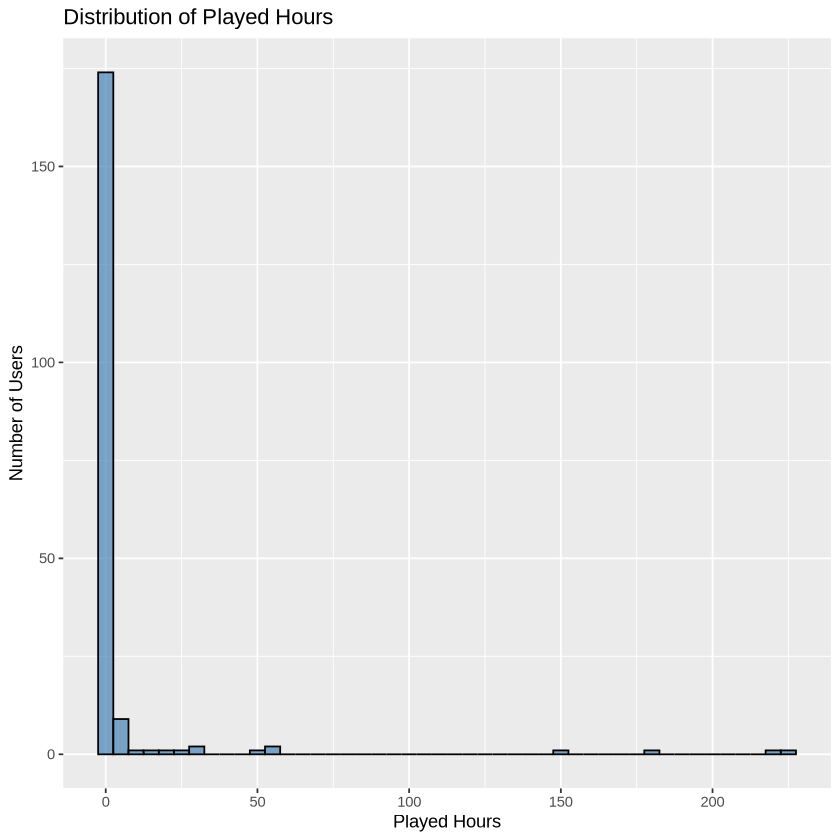

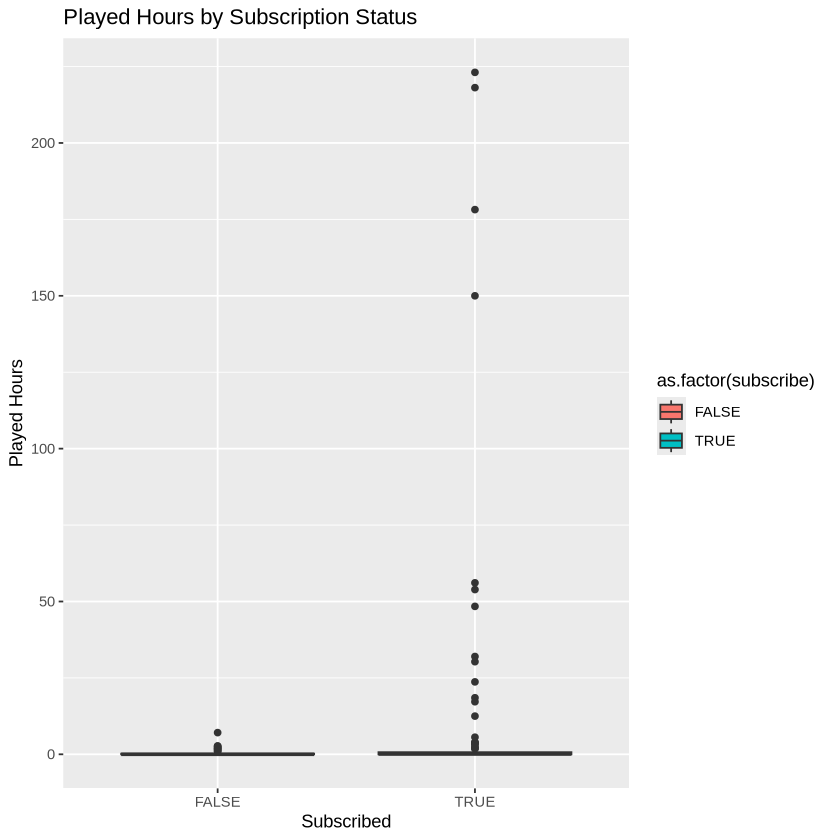

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


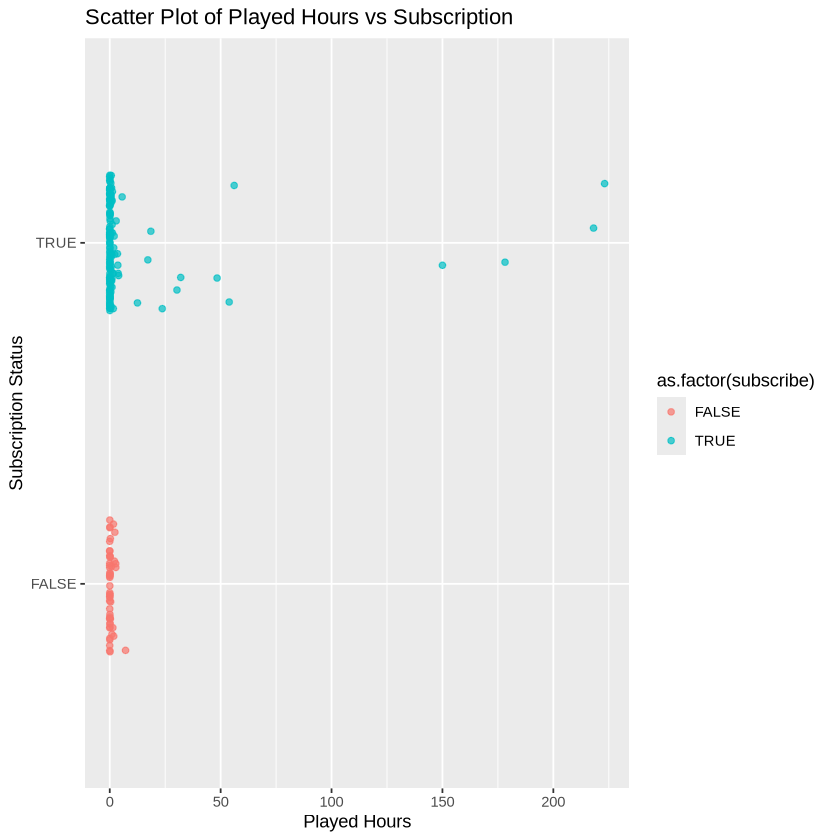

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


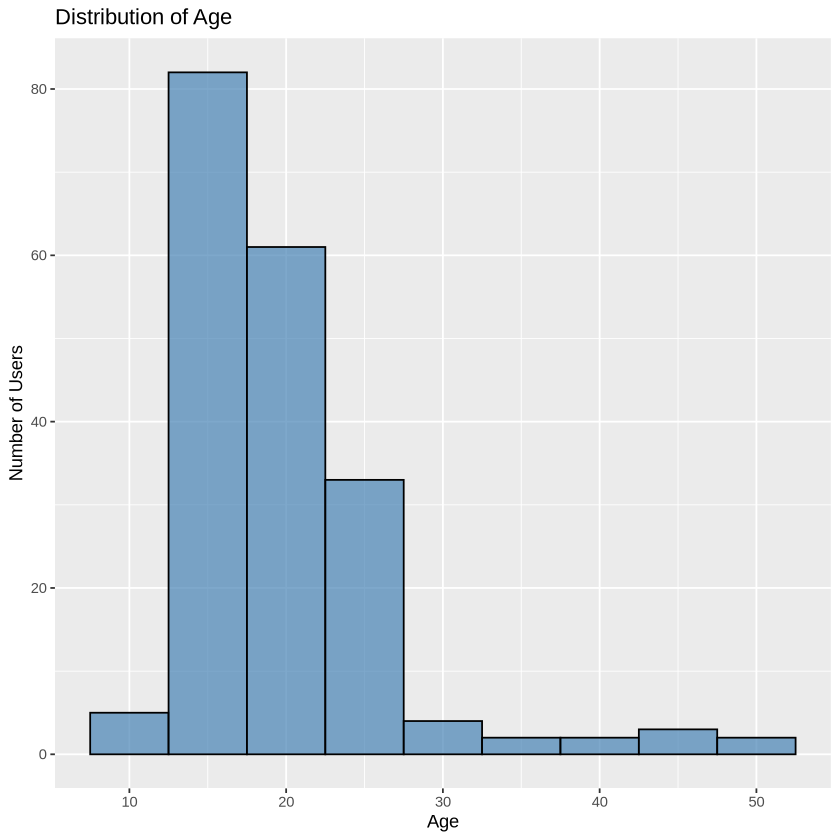

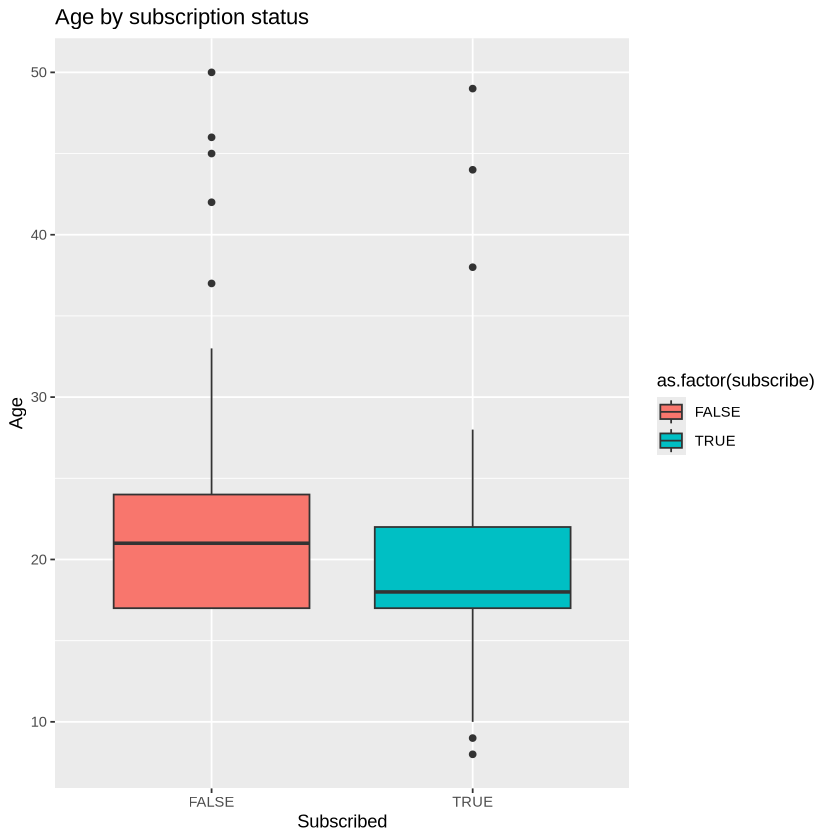

In [5]:
library(ggplot2)
library(dplyr)

# 1. Histogram of Played Hours  
played_hours_distribution <- ggplot(players, aes(x = played_hours)) +
                                  geom_histogram(binwidth = 5, fill = "steelblue", color = "black", alpha = 0.7) +
                                  labs(title = "Distribution of Played Hours", x = "Played Hours", y = "Number of Users") 
played_hours_distribution

# 2. Boxplot of Played Hours by Subscription Status  
played_hours_subscribe <- ggplot(player_select, aes(x = as.factor(subscribe), y = played_hours, fill = as.factor(subscribe))) +
                          geom_boxplot() +
                          labs(title = "Played Hours by Subscription Status", x = "Subscribed", y = "Played Hours")
played_hours_subscribe

# 3. Scatter Plot with Subscription  
subscription_scattered <- ggplot(player_select, aes(x = played_hours, y = subscribe)) +
                          geom_jitter(aes(color = as.factor(subscribe)), height = 0.2, alpha = 0.7) +
                          labs(title = "Scatter Plot of Played Hours vs Subscription", x = "Played Hours", y = "Subscription Status")
                         
subscription_scattered

#4. Histogram of Age
age_distribution <- ggplot(player_select, aes(x = Age)) +
                                  geom_histogram(binwidth = 5, fill = "steelblue", color = "black", alpha = 0.7) +
                                  labs(title = "Distribution of Age", x = "Age", y = "Number of Users") 
age_distribution

#5. Box Plot with Age
age_subscribe <- ggplot(players_tidy, aes(x = as.factor(subscribe), y = Age, fill = as.factor(subscribe))) +
                 geom_boxplot() +
                 labs(title = "Age by subscription status", x = "Subscribed", y = "Age")
age_subscribe



**Methods & Results**

1. Clean and wrangled the Player dataset to select for only the variables needed: played_hours, Age, and subscribe.
2. Graphed our data to see the relationships between Age of players vs. subscibed and time played vs. subscribed to determine if we can use these variables as predictors to classify if a player is subscribed or not.
3. After an initial visualization of the data, we realized that we had a lot of players with 0 hours played so we changed hours played into minutes played using the start_time and end_time variables in the Sessions dataset.
4. We used this cleaned data to make a scatter plot to visualize the relationship between our predictors and classifier. We found that there is no clear linear boundary between TRUE and FALSE classes. Clusters exist, but they are somewhat mixed: users with low minutes & low age (mostly TRUE), users with very high minutes (mostly TRUE), users scattered around mid-level minutes show a mix. As well, since played_minutes is on a log scale, it spans a much wider range than Age. As such, before using KNN, we will have to normalize or standardize both Age and played_minutes so that one feature doesn’t dominate the distance calculation.

5. We then found the best K-value to perform a KNN analysis to predict if a player is subscribed or not based on their age and minutes played. 

- Set a seed for reproducibility: ensures that when randomness is involved (like splitting data), the results are consistent every time you run the code.

- Prepare the data: Changes subscribe into a factor (which is required for classification) and remove any rows that contain missing (NA) values.

- Define the KNN Model (Tunable): creates a KNN model that will tune for the best number of neighbors (k).

- Define Range of k Values to Test: creates a list of k values from 1 to 20 to test.

- Split Data into Training and Testing Sets: Splits the data into: 75% training, 25% testing. Uses stratified sampling, so both TRUE and FALSE classes are balanced in both sets.

- Preprocessing Recipe: Tells the model to predict subscribe based on Age and played_minutes, applies normalization (mean = 0, SD = 1) to the predictors — essential for distance-based algorithms like KNN.

- 5-Fold Cross-Validation: Splits training data into 5 folds for cross-validation, maintaining class balance. The model is trained and tested 5 times on different data slices to get a reliable estimate of performance.

- Train KNN Models on Grid of k-values:

- Combines the recipe (preprocessing) and model into a workflow.

- Tunes the model across the grid of k values (1–20) using cross-validation.

- Collects performance metrics (like accuracy) for each k.

- Filter for Accuracy Metric: keeps only the accuracy scores for each value of k.

- Plot Accuracy vs K: Plots how model accuracy changes as k increases. Helps you visually find the best k value that gives the highest accuracy.

6. We used K = 7 to train a KNN model:
- Used the trained model to predict subscribe (TRUE or FALSE) on the test set. Then combined the predictions with the actual test data.
- Evaluate model accuracy: find accuracy, precision, and recall by creating a confusion matrix.


#### KNN 

predict subscription based on `age` and `played_hours`

Warning message in scale_x_continuous(trans = "log10"):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


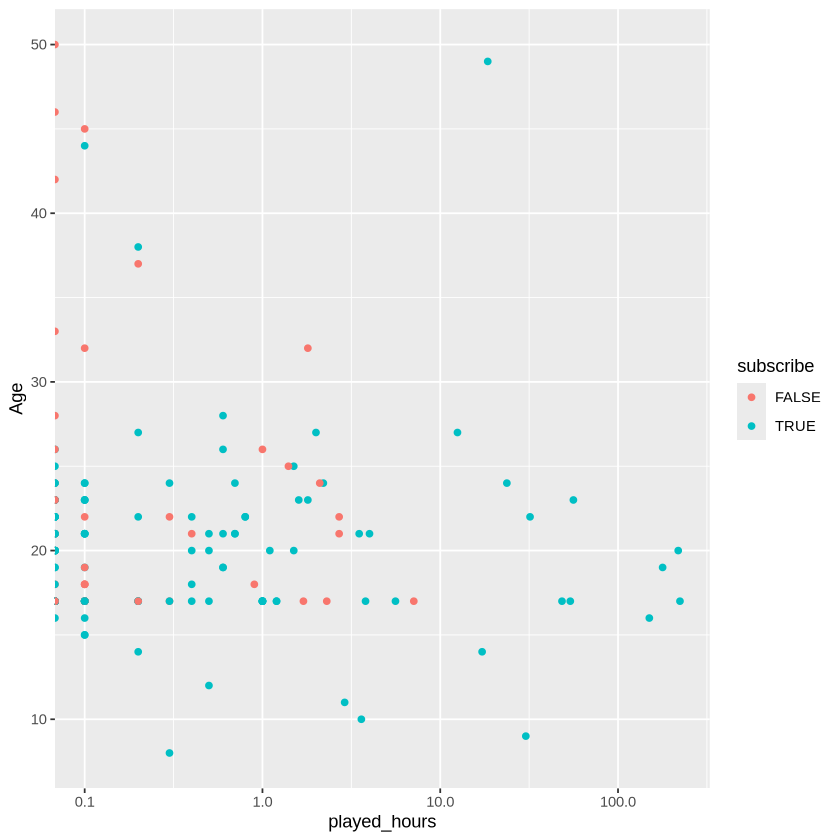

In [6]:
player_distribution <- player_select |>
    ggplot(aes(x=played_hours,y=Age,color=subscribe)) +
    geom_point() +
    scale_x_continuous(trans = "log10")

player_distribution

the data might not be good enough. we are going to refine the data from `session.csv`

In [7]:
session_durations <- sessions |>
    select(hashedEmail, start_time, end_time) |>
    mutate(start_time =as.POSIXct(start_time, format = "%d/%m/%Y %H:%M")) |>
    mutate(end_time =as.POSIXct(end_time, format = "%d/%m/%Y %H:%M")) |>
    mutate(duration=as.numeric(difftime(end_time, start_time, units = "mins"))) |>
    group_by(hashedEmail) |>
    summarize(played_minutes=sum(duration)) |>
    filter(played_minutes!=0)

cleaned_players <- merge(players, session_durations, by="hashedEmail") |>
    select(subscribe,played_minutes,Age)

cleaned_players

subscribe,played_minutes,Age
<lgl>,<dbl>,<dbl>
TRUE,106,20
FALSE,30,21
TRUE,11,17
TRUE,418,17
TRUE,70,17
FALSE,10,19
TRUE,50,21
TRUE,1217,14
FALSE,18,37


steven: extracted minutes from timestamps as the UNIX timestamp is not reliable.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


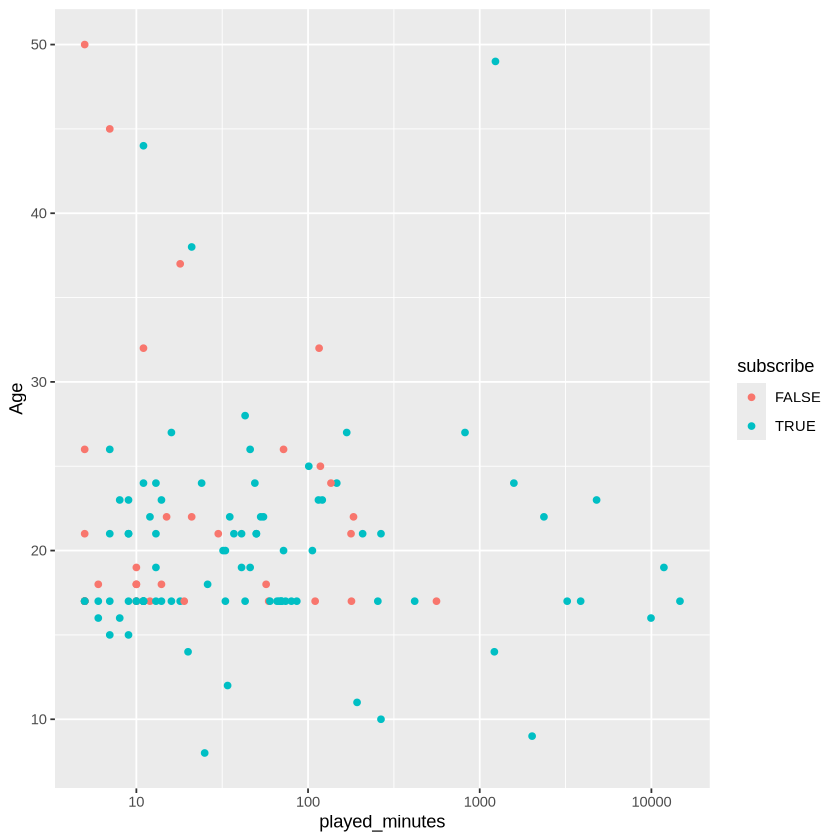

In [8]:
# to see if the cleaned data looks better on the graph
cleaned_player_distribution <- cleaned_players |>
    ggplot(aes(x=played_minutes,y=Age,color=subscribe)) +
    geom_point() +
    scale_x_continuous(trans = "log10")

cleaned_player_distribution

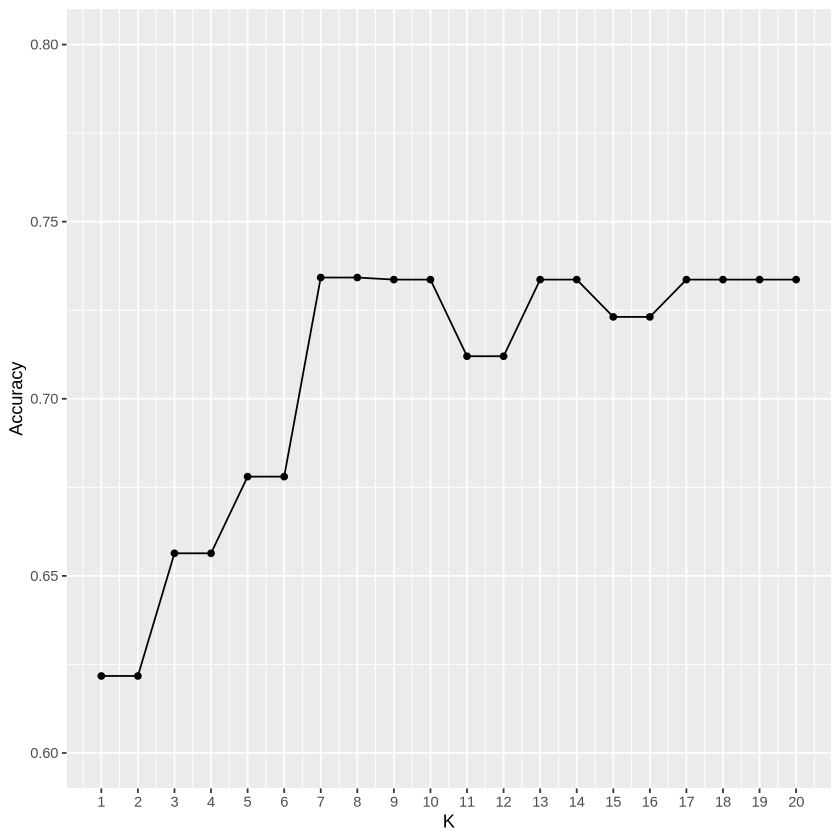

In [9]:
set.seed(77)

# change subscribe as a factor, and clean up NAs.
cleaned_players <- cleaned_players |>
    mutate(subscribe=as.factor(subscribe)) |>
    na.omit()

# tune spec
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# we test from 1 to 15
k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

# training and testing data
players_split <- initial_split(cleaned_players, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

# recipe
players_recipe <- recipe(subscribe ~ Age + played_minutes, data = players_train) |>
    step_normalize(all_predictors())

# 5-fold strata
players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

# results to test accuracy with metrics
knn_results <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = players_vfold, grid = k_vals) |>
    collect_metrics()

# get accuracies
accuracies <- knn_results |>
    filter(.metric == "accuracy")

# plot
acc_vs_k <- accuracies |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "K", y = "Accuracy") +
    scale_x_continuous(breaks = seq(0,20,by=1)) +
    scale_y_continuous(limits = c(0.6, 0.8))

acc_vs_k

from the graph we can say that our $K$ value should be $K \subset [7,10]$

In [10]:
set.seed(77)

# knn spec with K = 7
knn_spec_7 <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
    set_engine("kknn") |>
    set_mode("classification")

# knn model
players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec_7) |>
    fit(data = players_train)

players_fit

# validate
players_test_prediction <- predict(players_fit, players_test) |>
    bind_cols(players_test)

players_pred_accuracy <- players_test_prediction |>
    metrics(truth = subscribe, estimate = .pred_class)

players_confmat <- players_test_prediction |>
    conf_mat(truth = subscribe, estimate = .pred_class)


players_pred_accuracy
players_confmat

players_precision <- precision(players_test_prediction, truth = subscribe, estimate = .pred_class)
players_recall <- recall(players_test_prediction, truth = subscribe, estimate = .pred_class)

players_precision
players_recall

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(7,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3222222
Best kernel: rectangular
Best k: 7

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8387097
kap,binary,0.4709898


          Truth
Prediction FALSE TRUE
     FALSE     3    0
     TRUE      5   23

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.375


**Summary**

Our model has an accuracy of 83.8% which is pretty decent. The model has a precision of 100% and a recall of 37.5%. High precision but low recall means the model might be very conservative, only predicting that the player is subscribed (TRUE) when it’s extremely sure — but it could be missing a lot of actual TRUEs. This is possibly due to the large overlapping area in our dataset.

From our exploratory analysis, we found that played hours appears to be a strong indicator of whether a player subscribes to the game-related newsletter. The histogram of played hours showed a highly right-skewed distribution, with the vast majority of users playing less than 10 hours. However, when we compared subscribed and unsubscribed users, we noticed that only subscribed users had significantly high playtimes, with some outliers even exceeding 200 hours. The boxplot and scatter plot both reinforced this trend: players who subscribe are not only more active but also more varied in their total playtime.

In contrast, age did not seem to be a strong predictor of subscription. Although there were slight differences in median age — with subscribed users being a bit younger — the overall spread and distribution were fairly similar between the two groups. Most players fell into the 15–25 age range regardless of subscription status, suggesting that age alone might not explain much about newsletter engagement.

These findings were partially what we expected. It made intuitive sense that highly engaged players (i.e., those who play more hours) would be more likely to subscribe to updates, promotions, and event news. However, we initially thought age might have a clearer influence, perhaps assuming older users would be more inclined to stay updated via email — but this wasn't strongly supported by the data.

The potential impact of these findings is significant for game developers and marketers. Knowing that playtime is strongly associated with newsletter subscription means marketing teams can target active users more confidently, perhaps by nudging them toward subscribing with in-game prompts or special rewards. For less active users, different strategies may be needed — like offering one-time bonuses for signing up — to encourage them before they disengage.

This project also raises some interesting future questions:

Could other behavioral features like session frequency or time of day played be even better predictors of subscription?
What types of content in newsletters drive more interaction from different age or experience groups?
Could we build a predictive model to identify likely subscribers in real-time and personalize outreach?
And what about causality — do users subscribe because they’re more engaged, or does the newsletter itself help drive playtime and retention?
Overall, this analysis opens the door to more advanced modeling and segmentation strategies that could help improve player retention, engagement, and ultimately, in-game revenue.
